using python and numpy write function to sample from a continuous empirical distribution. 

function arguments

1. a sorted list of lower bounds of a discrete empirical distribution
2. a sorted list of the upper bounds of a discrete empirical distribution
3. a sorted list of cumulative probabilities of a discrete empirical distribution

The function

1. creates a numpy random Generator object 
2. samples a value U from the uniform(0, 1) distribution
2. uses U to obtain lower and upper bounds of a sample from the discrete empirical distribution 
3. uses linear interpolatation of U between the lower and upper bound in order to obtain a continuous value.  

return the continuous value.

do not use scipy

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:

def sample_from_empirical_distribution(lower_bounds, upper_bounds, cumulative_probs):
    # Create a numpy random Generator object
    rg = np.random.default_rng()
    
    # Sample a value U from the uniform(0, 1) distribution
    U = rg.random()
    
    # Obtain lower and upper bounds of a sample from the discrete empirical distribution
    idx = np.searchsorted(cumulative_probs, U)
    lb, ub = lower_bounds[idx], upper_bounds[idx]
    
    # Use linear interpolation of U between the lower and upper bound to obtain a continuous value
    continuous_value = lb + (ub - lb) * (U - cumulative_probs[idx-1]) / (cumulative_probs[idx] - cumulative_probs[idx-1])
    
    return continuous_value


In [136]:
class ContinuousEmpiricalDistribution:
    
    def __init__(self, lower_bounds, upper_bounds, freq, random_seed=None):
        self.lower_bounds = np.asarray(lower_bounds)
        self.upper_bounds = np.asarray(upper_bounds)
        self.cumulative_probs = self.create_cumulative_probs(freq)
        self.rng = np.random.default_rng(random_seed)

    def create_cumulative_probs(self, freq):
        freq = np.asarray(freq)
        return np.cumsum(freq / freq.sum())

    def sample(self, size=None):

        if size is None:
            size = 1

        samples = []
        for i in range(size):
        
            # Sample a value U from the uniform(0, 1) distribution
            U = self.rng.random()
            
            # Obtain lower and upper bounds of a sample from the discrete empirical distribution
            idx = np.searchsorted(self.cumulative_probs, U)
            lb, ub = self.lower_bounds[idx], self.upper_bounds[idx]
            
            # Use linear interpolation of U between the lower and upper bound to obtain a continuous value
            continuous_value = lb + (ub - lb) * (U - self.cumulative_probs[idx-1]) / (self.cumulative_probs[idx] - self.cumulative_probs[idx-1])

            samples.append(continuous_value)

        if size == 1:
            return samples[0]
        else:
            return np.asarray(samples)


In [143]:
dist = ContinuousEmpiricalDistribution(lower_bounds, upper_bounds, freq)
dist.sample(size=None)

8.734123868542092

In [144]:
freq = [34,
        4,
        8,
        13,
        15,
        13,
        19,
        13,
        9,
        12,
        73]


lower_bounds = [0,
                5,
                10,
                15,
                30,
                45,
                60,
                120,
                180,
                240,
                480]

upper_bounds = [5,
                10,
                15,
                30,
                45,
                60,
                120,
                180,
                240,
                480,
                2880]


# cumulative probs
probs = [0.15962441314554,
        0.178403755868545,
        0.215962441314554,
        0.276995305164319,
        0.347417840375587,
        0.408450704225352,
        0.497652582159624,
        0.55868544600939,
        0.60093896713615,
        0.657276995305164,
        1.0]

In [98]:
n = 10_000
results = [sample_from_empirical_distribution(lower_bounds, upper_bounds, probs) for _ in range(n)]

In [99]:
def distribution_plot(samples, bins):
    '''
    helper function to visualise the distributions
    '''
    hist = np.histogram(samples, bins=np.arange(bins), 
                        density=True)
    plt.hist(samples, density=True);
    plt.ylabel('p(x)');
    plt.xlabel('x');

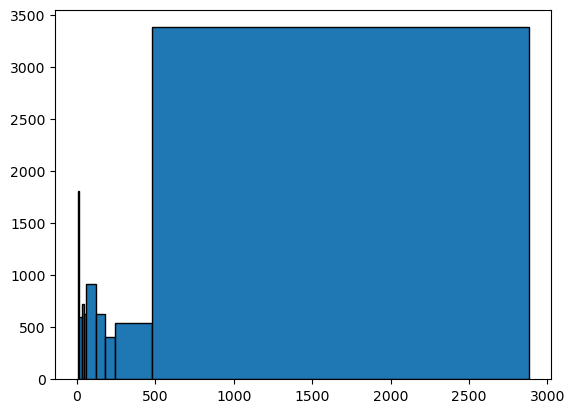

In [100]:
frq, edges = np.histogram(results, bins=upper_bounds)
fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

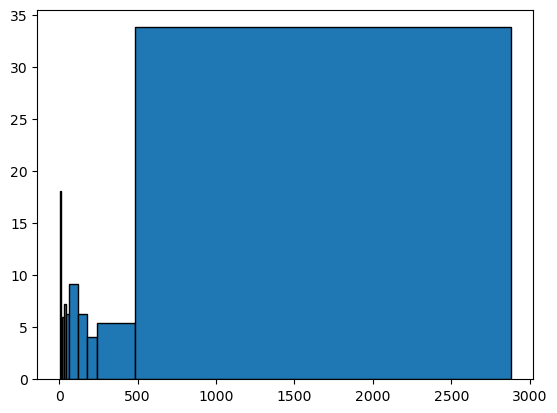

In [105]:


fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

In [ ]:
## Erlang distribution

In [161]:
class Erlang:
    '''
    Sum of k erlang distributions
    '''
    def __init__(self, mean, stdev, location=0.0, random_seed=None):
        self.mean = mean
        self.stdev = stdev
        self.location = location
        self.rng = np.random.default_rng(random_seed)

        # k also referred to as shape
        self.k = round((mean / stdev) ** 2)

        # theta also referred to as scale
        self.theta = mean / self.k

    def sample(self, size=None):
        return self.rng.gamma(self.k, self.theta, size) + self.location

In [ ]:
Mean (32.29), Standard deviation (9.26), Location (2.83)

In [167]:
mean = 32.9
stdev = 9.26
location = 2.83

N = 100_000
dist = Erlang(mean, stdev, location)
samples = dist.sample(N)

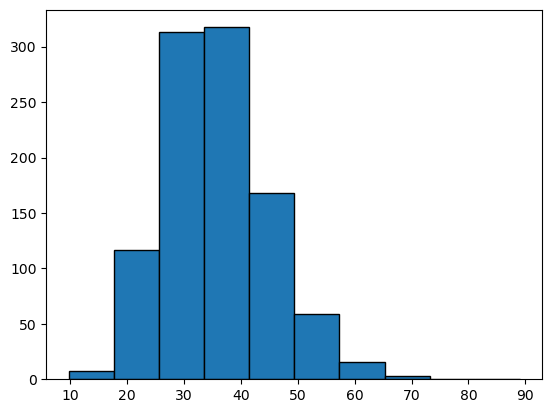

In [168]:
frq, edges = np.histogram(samples)
fig, ax = plt.subplots()
ax.bar(edges[:-1], (frq / n) * 100, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

In [170]:
(samples - location).mean()

32.94872198412259